In [2]:
from fastai.vision.all import *

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cell-images-for-detecting-malaria


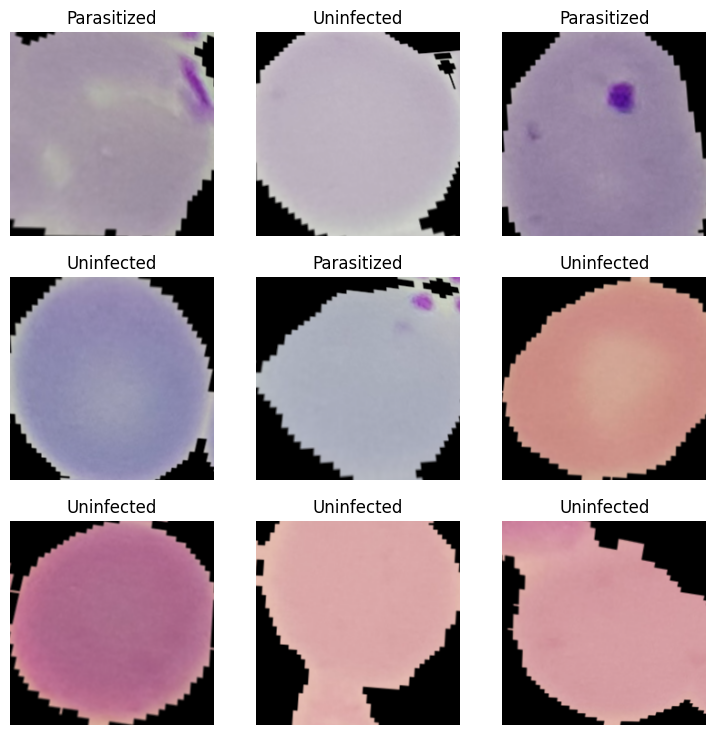

In [3]:
path = Path('/kaggle/input/cell-images-for-detecting-malaria')

# Create DataLoaders
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,   # Use 20% of data for validation
    seed=42,         # Set seed for reproducibility
    item_tfms=Resize(224), # Resize images to standard 224x224
    batch_tfms=aug_transforms() # Apply standard data augmentation (rotation, zoom, etc.)
)

# Verify data loaded correctly
dls.show_batch()

In [4]:
# Create the learner
learn = vision_learner(dls, resnet34, metrics=error_rate)

# Train the model
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 201MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.202809,0.149269,0.055339,02:30


epoch,train_loss,valid_loss,error_rate,time
0,0.118587,0.084202,0.030028,02:27


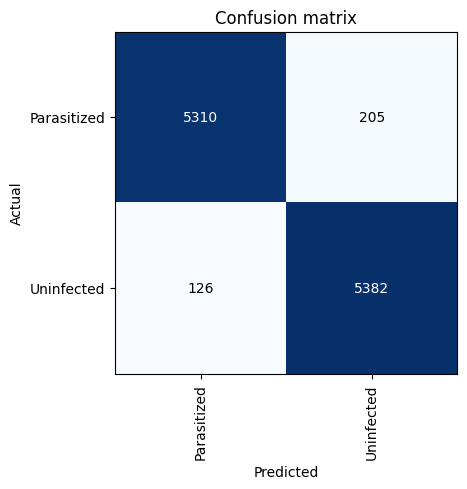

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:
# 1. Export the model
learn.path = Path('/kaggle/working')

# 2. Now export
learn.export('malaria_model.pkl')

print("Export successful!")

Export successful!


SuggestedLRs(valley=6.30957365501672e-05)

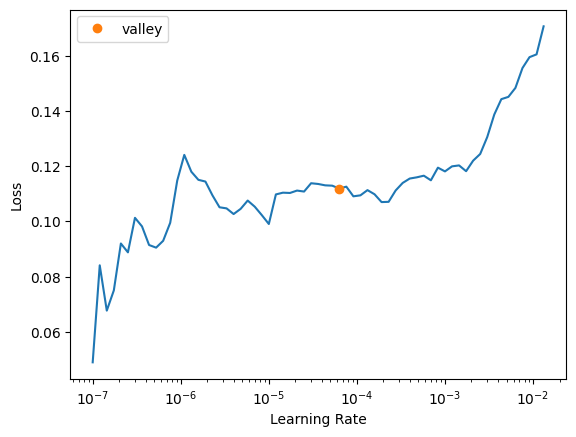

In [8]:
learn = load_learner('/kaggle/input/path-to-your-uploaded-model/malaria_model_final_97_8.pkl')

In [9]:
# Train for 6 epochs with a gentle learning rate
# using 5e-5 as the max speed because the graph gets unstable after that
learn.fit_one_cycle(6, lr_max=slice(1e-6, 5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.105829,0.085985,0.030119,02:22
1,0.098886,0.075391,0.026218,02:22
2,0.086878,0.070262,0.024766,02:27
3,0.084249,0.066582,0.023406,02:28
4,0.078857,0.068659,0.022861,02:28
5,0.078836,0.065177,0.022317,02:29


In [10]:
learn.path = Path('/kaggle/working')
learn.export('malaria_model1.pkl')

print("Final model exported successfully!")

Final model exported successfully!
